In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from scipy import stats
from sklearn import linear_model 
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn import ensemble

In [2]:
ols = linear_model.LinearRegression()
ridge = linear_model.Ridge()
lasso = linear_model.Lasso()
net = linear_model.ElasticNet()
sgd = linear_model.SGDClassifier
tree = DecisionTreeRegressor

In [10]:
housing = pd.read_csv('Ames_HousePrice.csv', index_col=0)
housing.shape

(2580, 81)

In [11]:
housing.columns

Index(['PID', 'GrLivArea', 'SalePrice', 'MSSubClass', 'MSZoning',
       'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond

In [19]:
housing.dtypes

PID               int64
GrLivArea         int64
SalePrice         int64
MSSubClass        int64
MSZoning         object
                  ...  
MiscVal           int64
MoSold            int64
YrSold            int64
SaleType         object
SaleCondition    object
Length: 81, dtype: object

In [66]:
test = housing[['SalePrice','GrLivArea', 'YearBuilt','YrSold', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond']].iloc[:500]

In [67]:
test

,SalePrice,GrLivArea,YearBuilt,YrSold,LotFrontage,LotArea,OverallQual,OverallCond
1,126000,856,1939,2010,NaN,7890,6,6
2,139500,1049,1984,2009,42.0,4235,5,5
3,124900,1001,1930,2007,60.0,6060,5,9
4,114000,1039,1900,2009,80.0,8146,4,8
5,227000,1665,2001,2009,70.0,8400,8,6
...,...,...,...,...,...,...,...,...
496,45000,612,1940,2009,50.0,5925,2,4
497,173000,1200,1964,2008,150.0,14137,4,5
498,128500,1281,1925,2007,60.0,10284,4,7
499,194000,1432,1978,2007,NaN,16157,5,7


In [68]:
variables = 'SalePrice','GrLivArea', 'YearBuilt','YrSold', 
'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond'

for var in variables:
    print(test[var].unique())

[126000 139500 124900 114000 227000 198500  93000 187687 137500 140000
 219500 136000  80000 159000 214000 163000 203000  67000 205000 131250
 181000 115000  98000 265979 105500 168165 201000 177500 200000 450000
  91300 173500 199500 207000 155000 220000 196000  61500 195000 129250
 291000 134000 186000 133500 148000 325300 215000 131000 109500 110000
 150000 193800 178000 179600 179000 395000 151500 341000 235000  72000
 154000 222000 390000 128200 615000 158000 254000 169000 284500 184500
 210400 392500 274725 156932 282922 144000  88000  67500 120000 134900
 185000 132500 160500 165000 100000 189900 227875 111900 145000 118000
 166000  99000  86000 211500 210000 228500 132000 468000 240000  73000
  75500 500067 330000 107500 172500 311872 165150 125000 159500 180500
 160000 109008 153000 132250 184900 127000 475000 142000 112000  80900
 135000 193500 232500 257000 117000 213000 212000 202500 185101 167000
 138500 102000 198900 278000 318000 146500  86900 262000 217500 113000
 24550

In [69]:
test.OverallCond.unique()

array([6, 5, 9, 8, 4, 3, 7, 1, 2], dtype=int64)

In [47]:
test

,SalePrice,GrLivArea,YearBuilt,YrSold,LotFrontage,LotArea,OverallQual,OverallCond
1,126000,856,1939,2010,NaN,7890,6,6
2,139500,1049,1984,2009,42.0,4235,5,5
3,124900,1001,1930,2007,60.0,6060,5,9
4,114000,1039,1900,2009,80.0,8146,4,8
5,227000,1665,2001,2009,70.0,8400,8,6
...,...,...,...,...,...,...,...,...
496,45000,612,1940,2009,50.0,5925,2,4
497,173000,1200,1964,2008,150.0,14137,4,5
498,128500,1281,1925,2007,60.0,10284,4,7
499,194000,1432,1978,2007,NaN,16157,5,7


In [181]:
test[test.YrSold == 2009].SalePrice.mean()

173549.45544554456

In [186]:
test[test.YrSold == 2008].SalePrice.mean()

196141.27272727274

In [49]:
np.sum(test.isnull())

SalePrice       0
GrLivArea       0
YearBuilt       0
YrSold          0
LotFrontage    73
LotArea         0
OverallQual     0
OverallCond     0
dtype: int64

In [56]:
test.LotFrontage.median()

69.0

In [72]:
test.LotFrontage = test.LotFrontage.fillna(test.LotFrontage.median())
test

,SalePrice,GrLivArea,YearBuilt,YrSold,LotFrontage,LotArea,OverallQual,OverallCond
1,126000,856,1939,2010,69.0,7890,6,6
2,139500,1049,1984,2009,42.0,4235,5,5
3,124900,1001,1930,2007,60.0,6060,5,9
4,114000,1039,1900,2009,80.0,8146,4,8
5,227000,1665,2001,2009,70.0,8400,8,6
...,...,...,...,...,...,...,...,...
496,45000,612,1940,2009,50.0,5925,2,4
497,173000,1200,1964,2008,150.0,14137,4,5
498,128500,1281,1925,2007,60.0,10284,4,7
499,194000,1432,1978,2007,69.0,16157,5,7


In [73]:
np.sum(test.isnull())

SalePrice      0
GrLivArea      0
YearBuilt      0
YrSold         0
LotFrontage    0
LotArea        0
OverallQual    0
OverallCond    0
dtype: int64

In [78]:
X = test.drop('SalePrice', axis = 1).copy()
y = test.SalePrice.copy()
X

,GrLivArea,YearBuilt,YrSold,LotFrontage,LotArea,OverallQual,OverallCond
1,856,1939,2010,69.0,7890,6,6
2,1049,1984,2009,42.0,4235,5,5
3,1001,1930,2007,60.0,6060,5,9
4,1039,1900,2009,80.0,8146,4,8
5,1665,2001,2009,70.0,8400,8,6
...,...,...,...,...,...,...,...
496,612,1940,2009,50.0,5925,2,4
497,1200,1964,2008,150.0,14137,4,5
498,1281,1925,2007,60.0,10284,4,7
499,1432,1978,2007,69.0,16157,5,7


In [79]:
y

1      126000
2      139500
3      124900
4      114000
5      227000
        ...  
496     45000
497    173000
498    128500
499    194000
500    178000
Name: SalePrice, Length: 500, dtype: int64

In [165]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

In [153]:
ols.fit(X,y)
print(ols.coef_)
print(ols.intercept_)
print(ols.score(X, y))

[5.31467555e+01 6.20773420e+02 3.09618053e+02 4.06511098e+02
 6.84827959e-01 2.50162270e+04 4.73315123e+03]
-1956288.8430422288
0.7483480411591548


In [166]:
ols.fit(X_train,y_train)
print(ols.coef_)
print(ols.intercept_)
print(ols.score(X_train, y_train))
print(ols.score(X_test, y_test))

[ 5.33676491e+01  6.24672804e+02 -3.22443477e+02  3.45273113e+02
  7.54422795e-01  2.31630927e+04  5.64554207e+03]
-686187.0373372512
0.7411267346061403
0.7620486778894584


In [167]:
ridge.set_params(alpha = 10)
ridge.fit(X_train,y_train)
print(ridge.coef_)
print(ridge.intercept_)
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))

[ 5.43369649e+01  6.40033728e+02 -3.49939879e+02  3.43205757e+02
  7.52912081e-01  2.24555918e+04  5.61938974e+03]
-658052.2955561613
0.7410650250933577
0.760897595505386


In [168]:
lasso.set_params(alpha = 1000)
lasso.fit(X_train,y_train)
print(lasso.coef_)
print(lasso.intercept_)
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

[ 5.47915294e+01  6.37061898e+02 -0.00000000e+00  3.39943517e+02
  7.49176909e-01  2.21702339e+04  4.95223901e+03]
-1349679.16821698
0.7408530106444691
0.7611157946757149


In [175]:
ridge.set_params()
lasso.set_params()
ridge_scores_train = []
lasso_scores_train = []
ridge_scores_test  = []
lasso_scores_test  = []

alphas = np.linspace(0, 100000, 100)

for alpha in alphas:
            ridge.set_params(alpha=alpha)
            lasso.set_params(alpha=alpha)
            ridge.fit(X_train, y_train)
            lasso.fit(X_train, y_train)
            ridge_scores_train.append(ridge.score(X_train, y_train))
            ridge_scores_test.append(ridge.score(X_test, y_test))
            lasso_scores_train.append(lasso.score(X_train, y_train))
            lasso_scores_test.append(lasso.score(X_test, y_test))
ridge_scores_train = np.array(ridge_scores_train) 
ridge_scores_test  = np.array(ridge_scores_test)
lasso_scores_train = np.array(lasso_scores_train) 
lasso_scores_test  = np.array(lasso_scores_test)

C:\Users\Natal\anaconda3\Lib\site-packages\sklearn\base.py:1151: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
C:\Users\Natal\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\Natal\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.359e+11, tolerance: 2.595e+08 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinat

Text(0, 0.5, '$R^2$')

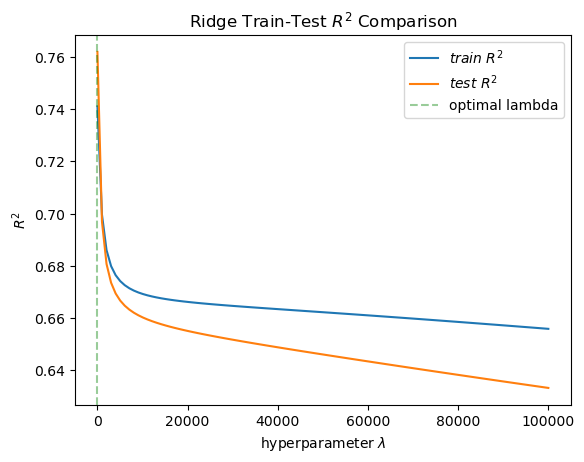

In [176]:
plt.plot(alphas, ridge_scores_train, label=r'$train\ R^2$')
plt.plot(alphas, ridge_scores_test, label=r'$test\ R^2$')
plt.legend(loc=1)
plt.title(r'Ridge Train-Test $R^2$ Comparison')
ridge_underfit = ridge_scores_train < ridge_scores_test
#### important
# this code will only work if train is over taking testing 
# if the test overtakes train then you have to switch the < to >
# I was getting this when I was chaing the lambda and the random seed
last_underfit  = np.max(alphas[ridge_underfit])
plt.axvline(last_underfit, linestyle='--', color='g', label='optimal lambda', alpha=0.4)
plt.legend(loc=1)
plt.xlabel(r'hyperparameter $\lambda$')
plt.ylabel(r'$R^2$')

Text(0, 0.5, '$R^2$')

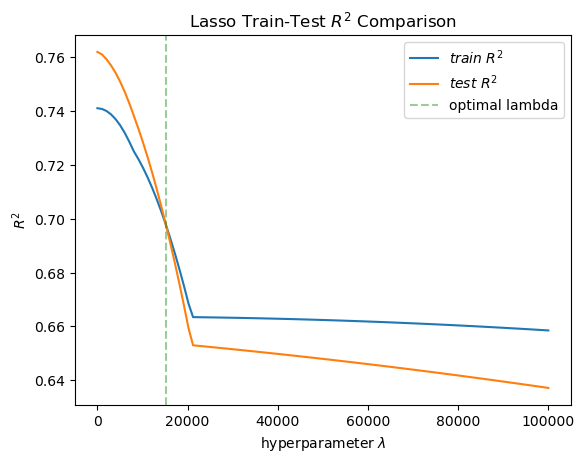

In [177]:
plt.plot(alphas, lasso_scores_train, label=r'$train\ R^2$')
plt.plot(alphas, lasso_scores_test, label=r'$test\ R^2$')
plt.title(r'Lasso Train-Test $R^2$ Comparison')
lasso_underfit = lasso_scores_train < lasso_scores_test
last_underfit  = np.max(alphas[lasso_underfit])
plt.axvline(last_underfit, linestyle='--', color='g', label='optimal lambda', alpha=0.4)
plt.legend(loc=1)
plt.xlabel(r'hyperparameter $\lambda$')
plt.ylabel(r'$R^2$')